In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.special import factorial

In [6]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Exercise 1 -- Simulating the Binomial Distribution
 Write python code which takes as input the number of trials N (i.e., coins that are being flipped) and the number of successes x (out of N), and reports the observed probability: P(N,x) for a coin flip (assuming p(heads or tails) = 0.5).  Explain your methods in your report (your code itself will not be in report but saved in your folder for reference).  Compare your simulation with the expections from the analytic formula:
$P(N,x)=\frac{N!}{x!(N-x)!} p^x (1-p)^{N-x}	$		

DO NOT USE the binomial formula to generate your data. Instead, use the frequentist technique of averaging over a large set of M realizations from a random variable. 



In [7]:
# Definitions

counts = np.zeros(20)
N = 1000 # number of runs
x = 0 # number of successes out of N
n = 20 # number of coins each run

Text(0, 0.5, '# of occurances out of n trials')

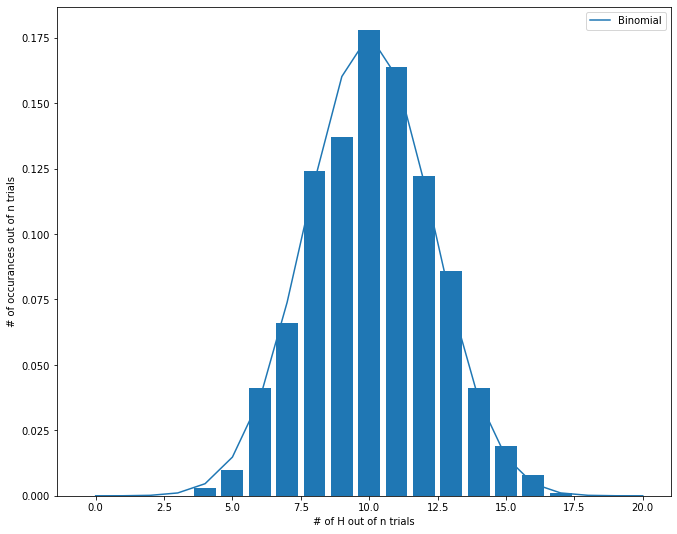

In [8]:
# Draw between 0 and 1. If draw is 1, add a "success" count to the array
# Produces and then graphs the amount of times a certain # of H out of N 
# occurred (prob). 

for i in range(0,N):
        draw = np.random.randint(2, size=n)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        prob = counts / N 
plt.bar(np.arange(20), prob )

# Overplotting the analytic prediction of P(20,x) using the binomial probability formula.

def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
plt.plot(PNx(20), label="Binomial")

# Graph details

plt.legend(loc="upper right")
plt.xlabel("# of H out of n trials")
plt.ylabel("# of occurances out of n trials")

##Exercise 2 - Binomial to Gaussian PDF. 


a. In the limit of small p, we can derive the Poisson probability distribution function from the binomial PDF.  Please show in the Theory section of your report that the binomial formula

$P(N,x)=\frac{N!}{x!(N-x)!} p^x (1-p)^{N-x}	$		

can be simplified simplified, in limit of $p<<1$,

$P(N,x) = \frac{\lambda^x}{x!}  {e^{-\lambda}}$, where $\lambda = Np$






In [9]:
import random
import decimal
import math

# Definitions

N = 1000
x = 0
n = 100
p = 0.01
b = n+1

Text(0, 0.5, '# of occurances out of n trials')

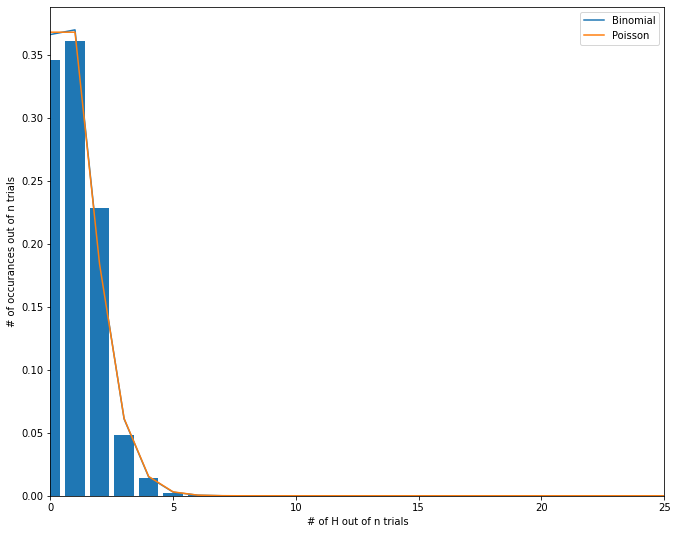

In [10]:
# Binom PDF for adjustable p. Picks a random decimal between 0 and 1. If 
# the decimal is less than p, it counts as a success and is added to 
# the array just as the last PDF loop.

counts = np.zeros(n+1)
for i in range(0,N):
  draw = np.random.uniform(low=0,high=1.,size=n)
  heads_count = len(draw[(np.where(draw < p))])
  counts[heads_count] = counts[heads_count] + 1
prob = counts / N 
plt.bar(np.arange(b), prob)

# Overplotting the analytic prediction of P(n,x) using the binomial probability formula.

def PNx(N):
    p = 0.01
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx
plt.plot(PNx(n), label="Binomial")

# Overplotting the analytic prediction of P(n,x) using the Poisson probability formula.

def Poisson(N):
    p = 0.01
    x = (np.arange(N+1))
    poi = (((N*p)**x)/factorial(x))*math.exp(-N*p)
    return poi
plt.plot(Poisson(n),label="Poisson")

# Graph details

plt.xlim(0,25)
plt.legend(loc="upper right")
plt.xlabel("# of H out of n trials")
plt.ylabel("# of occurances out of n trials")

##Exercise 3 - Poisson Noise


With your simulation from last part for small p, Lets explore Poisson Noise.  For a given and x, we get a range of results which describe the PDF (probability distribution function). The PDFs can be described by their mean and Variance.   Recall: Var(x) $= < (x-<x>)^2> = <x^2> - <x>^2 $

In [11]:
# Definitions

N = 10000
x = 0
n = 10
p = 0.01

# Calculating for a range of coins

mean = [] # Resetting arrays
var = []
while n <= 1000: # Changes the number of coins being flipped
  newArr = [] # Resetting arrays
  counts = np.zeros(n+1)
  for i in range(0,N): # Repeats trials 
    draw = np.random.uniform(low=0,high=1.,size=n) # loops through individual coins (flips each)
    heads_count = len(draw[(np.where(draw < p))])
    counts[heads_count] = counts[heads_count] + 1
    newArr.append(heads_count)
  n = n + 10
  mean.append(np.mean(newArr))
  var.append(np.var(newArr))

b. Now, plot the Variance (y axis) vs mean (x axis) and fit a line to the curve.  Does this result depend on value of p?

Best fit line is y = 0.986075890990601 x + 0.002274690529342931


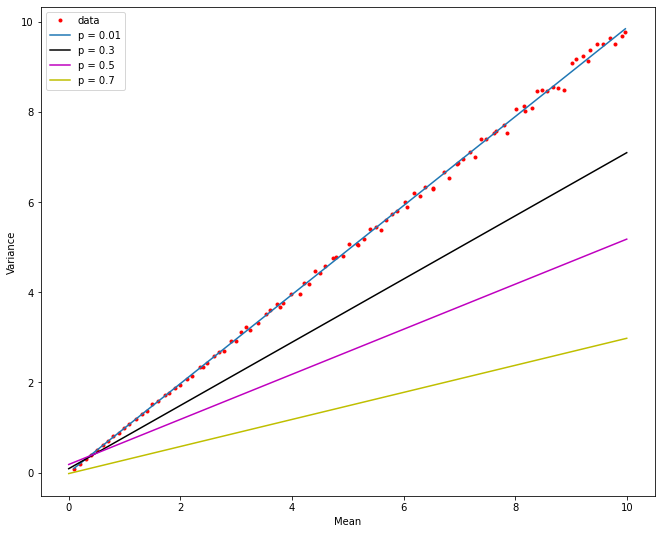

In [12]:
# Plotting the variance vs the mean and fitting it to a curve 

coeff=np.polyfit(mean, var,1)
poly = np.poly1d(coeff)
new_x = np.linspace(min(mean),max(mean))
new_y = poly(new_x)
plt.plot(mean, var, 'r.', label = "data")
plt.plot( new_x, new_y, label = "p = 0.01")

plt.xlabel('Mean')
plt.ylabel('Variance')

m, b = np.polyfit(mean, var, 1.0)
print("Best fit line is y =", m, 'x +', b )

# Yes, the result depends heavily on the value of p. 

# p = 0.01 : Best fit line is y = 0.9902150636579332 x + -0.0038365895664251803
# p = 0.3 : Best fit line is y = 0.7003695030456485 x + 0.0889366079874238
# p = 0.5 : Best fit line is y = 0.49940280987118174 x + 0.1824736885305884
# p = 0.7 : Best fit line is y = 0.29981233380944877 x + -0.019106485711806995

mean2 = np.linspace(0, 10)
plt.plot(mean2, 0.7003695030456485*mean2 + 0.0889366079874238, 'k', label = "p = 0.3")
plt.plot(mean2, 0.49940280987118174*mean2 + 0.1824736885305884, 'm', label = "p = 0.5")
plt.plot(mean2, 0.29981233380944877*mean2 + -0.019106485711806995, 'y', label = "p = 0.7")
plt.legend(loc="upper left")